In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Flipkart Product Recommendation/flipkart_product_review.csv")
data.head()

,product_id,product_title,rating,summary,review
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i..."
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...


## Installing Dependencies

In [ ]:
!pip install -q langchain
!pip install -q langchain-community
!pip install -q langchain-astradb
!pip install -q langchain-groq
!pip install -q pypdf

In [ ]:
data.head()

,product_id,product_title,rating,summary,review
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i..."
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...


In [ ]:
data.columns

Index(['product_id', 'product_title', 'rating', 'summary', 'review'], dtype='object')

In [ ]:
data = data[["product_title", "review"]]

In [ ]:
data.head()

,product_title,review
0,BoAt Rockerz 235v2 with ASAP charging Version ...,1-more flexible2-bass is very high3-sound clar...
1,BoAt Rockerz 235v2 with ASAP charging Version ...,Super sound and good looking I like that prize
2,BoAt Rockerz 235v2 with ASAP charging Version ...,Very much satisfied with the device at this pr...
3,BoAt Rockerz 235v2 with ASAP charging Version ...,"Nice headphone, bass was very good and sound i..."
4,BoAt Rockerz 235v2 with ASAP charging Version ...,Sound quality super battery backup super quali...


# Convert Data into Dcoument Fromat
[
   Document(metadata={'product_name': 'BoAt BassHeads 100 Wired Headset'}, page_content='a very good earphone in budget sound is awesome very pure sound but the bass is ok ok..  you can go for it without thinking much')
]


In [ ]:
product_list = []

## Itrate over the rows of the DataFrame

for index, row in data.iterrows():
  object = {
      "product_name": row["product_title"],
      "review": row["review"]
  }

  ## Append the object to the product list

  product_list.append(object)

In [ ]:
product_list[0]

{'product_name': 'BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset',
 'review': "1-more flexible2-bass is very high3-sound clarity is good 4-battery back up to 6 to 8 hour's 5-main thing is fastest charging system is available in that. Only 20 min charge and get long up to 4 hours back up 6-killing look awesome 7-for gaming that product does not support 100% if you want for gaming then I'll recommend you please don't buy but you want for only music then this product is very well for you.. 8-no more wireless headphones are comparing with that headphones at this pric..."}

In [ ]:
from langchain_core.documents import Document

In [ ]:
docs = []

for object in product_list:
  metadata = {"product_name": object["product_name"]}
  page_content = object["review"]

  doc = Document(page_content= page_content, metadata= metadata)

  docs.append(doc)


In [ ]:
docs[0]

Document(metadata={'product_name': 'BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset'}, page_content="1-more flexible2-bass is very high3-sound clarity is good 4-battery back up to 6 to 8 hour's 5-main thing is fastest charging system is available in that. Only 20 min charge and get long up to 4 hours back up 6-killing look awesome 7-for gaming that product does not support 100% if you want for gaming then I'll recommend you please don't buy but you want for only music then this product is very well for you.. 8-no more wireless headphones are comparing with that headphones at this pric...")

In [ ]:
len(docs)

450

In [ ]:
GROQ_API = ""
ASTRA_DB_API_ENDPOINT = ""
ASTRA_DB_APPLICATION_TOKEN = ""
ASTRA_DB_KEYSPACE = "default_keyspace"
HF_TOKEN = ""

In [ ]:
# from langchain_community.embeddings import HuggingFaceInferenceAPIEmbeddings

# embeddings = HuggingFaceInferenceAPIEmbeddings(api_key= HF_TOKEN, model_name= "BAAI/bge-base-en-v1.5")

In [ ]:
!pip install langchain_community

In [ ]:
# !pip install sentence-transformers

In [ ]:
!pip install --upgrade langchain-community huggingface_hub

In [ ]:
# from langchain.embeddings import HuggingFaceEmbeddings

# embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings

hf_embeddings = HuggingFaceEmbeddings(
    model_name="BAAI/bge-base-en-v1.5"
)

texts = ["Hello, world!", "How are you?"]
embeddings = hf_embeddings.embed_documents(texts)
print(embeddings)

[[0.00727997999638319, 0.031282395124435425, 0.042269572615623474, -0.006348561495542526, -0.007752950303256512, 0.04410851001739502, 0.0590987466275692, 0.04548809677362442, -0.02227294258773327, -0.03785543516278267, -0.006712988018989563, -0.003362990915775299, -0.08337988704442978, -0.005158690270036459, 0.01829081028699875, 0.051177989691495895, 0.03137902542948723, 0.01345100998878479, 0.006205123383551836, 0.03658396378159523, -0.03430967777967453, 0.004967953078448772, 0.03619927912950516, 0.013945563696324825, 0.021238399669528008, -0.03004315309226513, -0.02377571165561676, 0.012912238948047161, -0.11165976524353027, 0.0009536909637972713, 0.012539404444396496, 0.015945786610245705, 0.020773740485310555, -0.054188281297683716, -0.0015681317308917642, 0.020795566961169243, 0.008812276646494865, -0.0031685989815741777, -0.016219303011894226, -0.013779859989881516, -0.009815237484872341, -0.0372767336666584, -0.01713637262582779, 0.02806137129664421, -0.04146610572934151, -0.033

In [ ]:
# from langchain_community.embeddings import HuggingFaceEmbeddings

# from langchain.embeddings import HuggingFaceEmbeddings
# hf_embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [ ]:
from langchain_astradb import AstraDBVectorStore

In [ ]:
vstore = AstraDBVectorStore(
    embedding=hf_embeddings,
    collection_name="flipkart",
    api_endpoint=ASTRA_DB_API_ENDPOINT,
    token=ASTRA_DB_APPLICATION_TOKEN,
    namespace=ASTRA_DB_KEYSPACE
)

In [ ]:
insert_ids = vstore.add_documents(docs)

In [ ]:
insert_ids[0]

'4a60c7aa31234b56b6e60a5ec3e7e49b'

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import MessagesPlaceholder
from langchain.chains import create_history_aware_retriever

In [ ]:
model = ChatGroq(groq_api_key = GROQ_API, model="llama-guard-3-8b", temperature=0.5)

## Allowing Memory

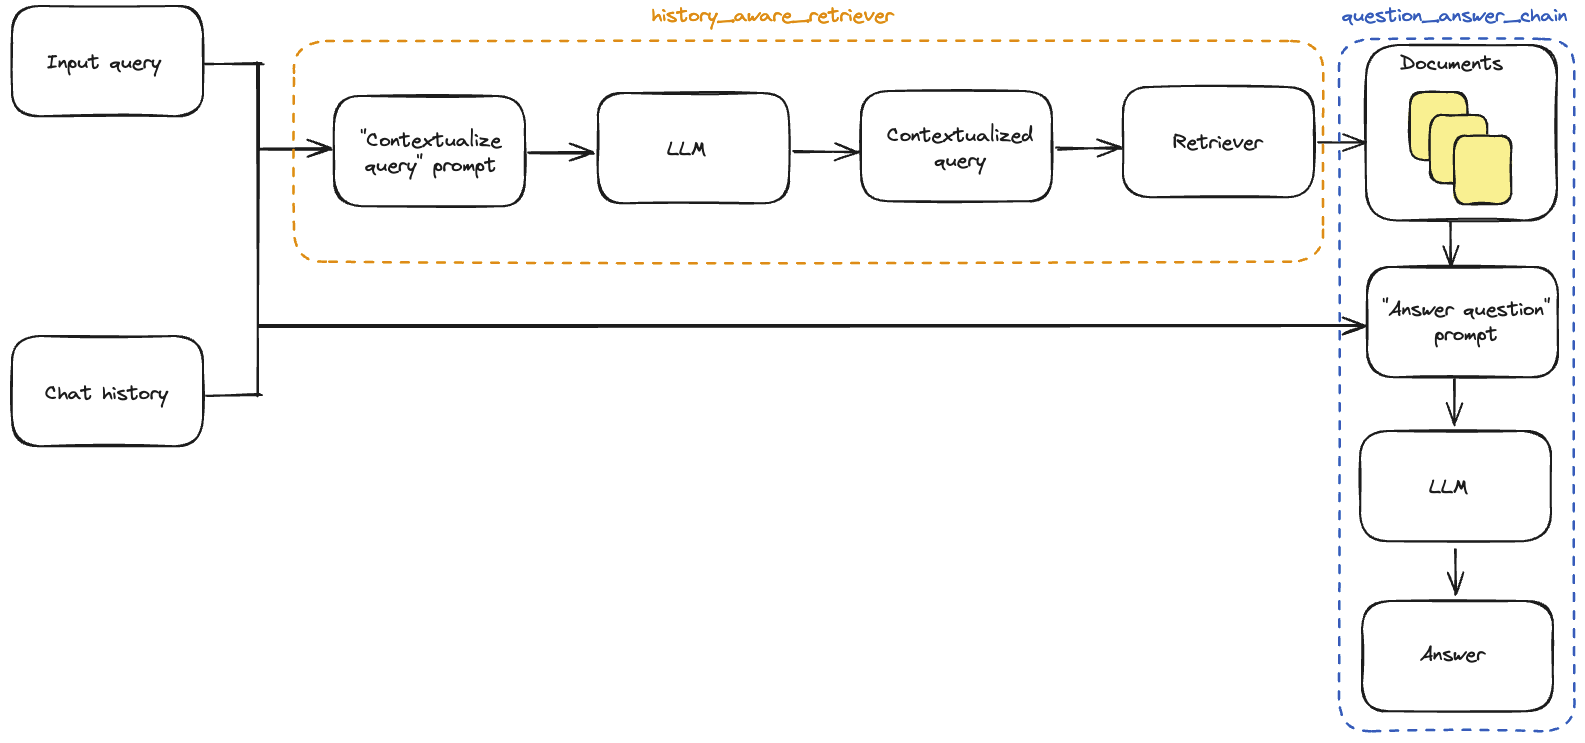

In [ ]:
retriever_prompt = ("Given a chat history and the latest user question which might reference context in the chat history,"
    "formulate a standalone question which can be understood without the chat history."
    "Do NOT answer the question, just reformulate it if needed and otherwise return it as is."
    )

In [ ]:
retriever = vstore.as_retriever(search_kwargs={"k": 3})

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

In [ ]:
contextualize_q_prompt = ChatPromptTemplate.from_messages(
    [
    ("system", retriever_prompt),
    MessagesPlaceholder(variable_name="chat_history"),
    ("human", "{input}"),
    ]
)

In [ ]:
history_aware_retriever = create_history_aware_retriever(model, retriever, contextualize_q_prompt)

In [ ]:
PRODUCT_BOT_TEMPLATE = """
    Your ecommercebot bot is an expert in product recommendations and customer queries.
    It analyzes product titles and reviews to provide accurate and helpful responses.
    Ensure your answers are relevant to the product context and refrain from straying off-topic.
    Your responses should be concise and informative.

    CONTEXT:
    {context}

    QUESTION: {input}

    YOUR ANSWER:

    """

In [ ]:
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", PRODUCT_BOT_TEMPLATE),
        MessagesPlaceholder(variable_name="chat_history"),
        ("human", "{input}")
    ]
)

In [ ]:
question_answer_chain = create_stuff_documents_chain(model, qa_prompt)

In [ ]:
chain = create_retrieval_chain(history_aware_retriever, question_answer_chain)

In [ ]:
chat_history = []

In [ ]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

In [ ]:
store = {}

In [ ]:
def get_session_history(session_id: str)-> BaseChatMessageHistory:
  if session_id not in store:
    store[session_id]= ChatMessageHistory()
  return store[session_id]

In [ ]:
chain_with_memmory = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="input",
    history_messages_key="chat_history",
    output_messages_key="answer",
)

In [ ]:
chain_with_memmory.invoke(
   {"input": "can you tell me the best bluetooth buds?"},
    config={
        "configurable": {"session_id": "akash"}
    },  # constructs a key "abc123" in `store`.
)["answer"]

'safe'

In [ ]:
store

{'dhruv': InMemoryChatMessageHistory(messages=[HumanMessage(content='can you tell me the best bluetooth buds?', additional_kwargs={}, response_metadata={}), AIMessage(content='safe', additional_kwargs={}, response_metadata={}), HumanMessage(content='what is my previous question?', additional_kwargs={}, response_metadata={}), AIMessage(content='safe', additional_kwargs={}, response_metadata={})]),
 'akash': InMemoryChatMessageHistory(messages=[HumanMessage(content='can you tell me the best bluetooth buds?', additional_kwargs={}, response_metadata={}), AIMessage(content='safe', additional_kwargs={}, response_metadata={}), HumanMessage(content='can you tell me the best bluetooth buds?', additional_kwargs={}, response_metadata={}), AIMessage(content='safe', additional_kwargs={}, response_metadata={})])}

In [ ]:
chain_with_memmory.invoke(
   {"input": "what is my previous question?"},
    config={
        "configurable": {"session_id": "akash"}
    },  # constructs a key "abc123" in `store`.
)["answer"]

'safe'

In [ ]:
store

{'dhruv': InMemoryChatMessageHistory(messages=[HumanMessage(content='can you tell me the best bluetooth buds?', additional_kwargs={}, response_metadata={}), AIMessage(content='safe', additional_kwargs={}, response_metadata={}), HumanMessage(content='what is my previous question?', additional_kwargs={}, response_metadata={}), AIMessage(content='safe', additional_kwargs={}, response_metadata={})]),
 'akash': InMemoryChatMessageHistory(messages=[HumanMessage(content='can you tell me the best bluetooth buds?', additional_kwargs={}, response_metadata={}), AIMessage(content='safe', additional_kwargs={}, response_metadata={}), HumanMessage(content='can you tell me the best bluetooth buds?', additional_kwargs={}, response_metadata={}), AIMessage(content='safe', additional_kwargs={}, response_metadata={}), HumanMessage(content='what is my previous question?', additional_kwargs={}, response_metadata={}), AIMessage(content='safe', additional_kwargs={}, response_metadata={})])}